# Estadística descriptiva básica en R

## Instalamos paquetes

In [1]:
# Paquetes para hacer resúmenes de conjuntos de datos
# install.packages("summarytools")
# install.packages("modeest")

# Paquete para estimar la moda de un vector univariado
# install.packages("skimr")

# Paquete para hacer diversas gráficas
# install.packages("ggpubr")

In [2]:
# install.packages("repr")
library("repr")
options(repr.plot.width = 14, repr.plot.height=10)

## Importar datos

In [3]:
library("tidyverse")
library("skimr")
library("summarytools")
library("modeest")
library("ggpubr")

## Lectura
read_delim(
  file = "data/Boston_Housing.txt",
  delim = "|", 
  locale=locale(decimal_mark = ",")
) -> data_raw

## Revisar la estructura de los datos
str(data_raw)

## Convertimos variables respectivas a factores
factores <- c("CHAS","RAD")
data_raw %>% mutate_at(factores,factor) -> data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: ‘summarytools’


The following object is masked from ‘package:tibble’:

    view


Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr

Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),


tibble [506 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   CRIM = col

## Estadísticos descriptivos frecuentes

In [4]:
# Univariados
mean() # para la media
median() #para la mediana
modeest::mfv() # para la moda
var() # para la varianza
sd() # para la desviación estándar
max() # para el máximo
min() # para el mínimo
quantile() # para los cuantiles
IQR() # para el rango intercuartílico
# Multivariados
cov() # para la covarianza
cor() # para la correlación
table() # para tablas de contingencia - también sirve en una variable

ERROR: Error in mean.default(): el argumento "x" está ausente, sin valor por omisión


### Ejemplo: estadísticos descriptivos para la variable AGE (cuantitativa)

In [5]:
mean(data$AGE)

[1] 68.5749

In [6]:
median(data$AGE)

[1] 77.5

In [7]:
var(data$AGE)

[1] 792.3584

In [8]:
sd(data$AGE)

[1] 28.14886

In [9]:
max(data$AGE)

[1] 100

In [10]:
min(data$AGE)

[1] 2.9

In [11]:
quantile(data$AGE)

0%     25%     50%     75%    100% 
  2.900  45.025  77.500  94.075 100.000

In [12]:
IQR(data$AGE)

[1] 49.05

### Ejemplo: estadísticos descriptivos para la variable RAD (cualitativa)

In [13]:
# Moda
mfv(data$RAD)

[1] 24
Levels: 1 2 3 4 5 6 7 8 24

In [14]:
# Frecuencias
table(data$RAD)


  1   2   3   4   5   6   7   8  24 
 20  24  38 110 115  26  17  24 132 

In [15]:
# Proporciones
prop.table(table(data$RAD))


         1          2          3          4          5          6          7 
0.03952569 0.04743083 0.07509881 0.21739130 0.22727273 0.05138340 0.03359684 
         8         24 
0.04743083 0.26086957 

## Un método útil integrado en R: summary()

In [16]:
## Resumen para una sola variable
summary(data$AGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.90   45.02   77.50   68.57   94.08  100.00 

In [17]:
## Resumen para todo el conjunto de datos
summary(data)

      CRIM                ZN             INDUS       CHAS         NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
                                                                             
       RM             AGE              DIS              RAD     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   24     :132  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   5      :115  
 Median :6.208   Median : 77.50   Median : 3.207   4      :110  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   3      : 38  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   

Normalmente estas funciones no trabajan si encuentran datos perdidos, para eliminar esta restricción se usa

In [18]:
# Omitir datos perdidos
na.rm = TRUE

## Cálculo del promedio omitiendo datos perdidos/faltantes
mean(data$AGE, na.rm = TRUE)

[1] 68.5749

## Otros métodos de resumen útiles

In [19]:
# Resumen usando el paquete skimr
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             506   
Number of columns          14    
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  12    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 CHAS                  0             1 FALSE          2
2 RAD                   0             1 FALSE          9
  top_counts                    
1 0: 471, 1: 35                 
2 24: 132, 5: 115, 4: 110, 3: 38

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd        p0      p25
 1 CRIM                  0             1   3.61    8.60    0.00632   0.0820
 2 ZN                    0       

In [34]:
# Resumen usando el paquete summarytools
summarytools::descr(data)

,AGE,B,CRIM,DIS,INDUS,LSTAT,MEDV,NOX,PTRATIO,RM,TAX,ZN
Mean,68.5749012,356.6740316,3.6135236,3.7950427,11.1367787,12.6530632,22.5328063,0.55469506,18.4555336,6.2846344,408.2371542,11.3636364
Std.Dev,28.1488614,91.2948644,8.6015451,2.1057101,6.8603529,7.1410615,9.1971041,0.11587768,2.1649455,0.7026171,168.5371161,23.3224530
Min,2.9000000,0.3200000,0.0063200,1.1296000,0.4600000,1.7300000,5.0000000,0.38500000,12.6000000,3.5610000,187.0000000,0.0000000
Q1,45.0000000,375.3300000,0.0819900,2.1000000,5.1900000,6.9300000,17.0000000,0.44900000,17.4000000,5.8850000,279.0000000,0.0000000
Median,77.5000000,391.4400000,0.2565100,3.2074500,9.6900000,11.3600000,21.2000000,0.53800000,19.0500000,6.2085000,330.0000000,0.0000000
Q3,94.1000000,396.2300000,3.6782200,5.2119000,18.1000000,16.9600000,25.0000000,0.62400000,20.2000000,6.6250000,666.0000000,12.5000000
Max,100.0000000,396.9000000,88.9762000,12.1265000,27.7400000,37.9700000,50.0000000,0.87100000,22.0000000,8.7800000,711.0000000,100.0000000
MAD,28.9848300,8.0949960,0.3283218,1.9142590,9.3700320,7.1090670,5.9304000,0.12972750,1.7049900,0.5122383,108.2298000,0.0000000
IQR,49.0500000,20.8475000,3.5950375,3.0882500,12.9100000,10.0050000,7.9750000,0.17500000,2.8000000,0.7380000,387.0000000,12.5000000
CV,0.4104834,0.2559616,2.3803761,0.5548581,0.6160087,0.5643741,0.4081651,0.20890339,0.1173060,0.1117992,0.4128412,2.0523759


Skewness: Cercano a 3, son datos simétricos

## Gráficas básicas

![distribuciones](images/distributions.png)

### Diagrama de puntos

Presenta los valores de una variable para cada observación usando símbolos, y cada observación se grafica de manera relativa al número de la observación.

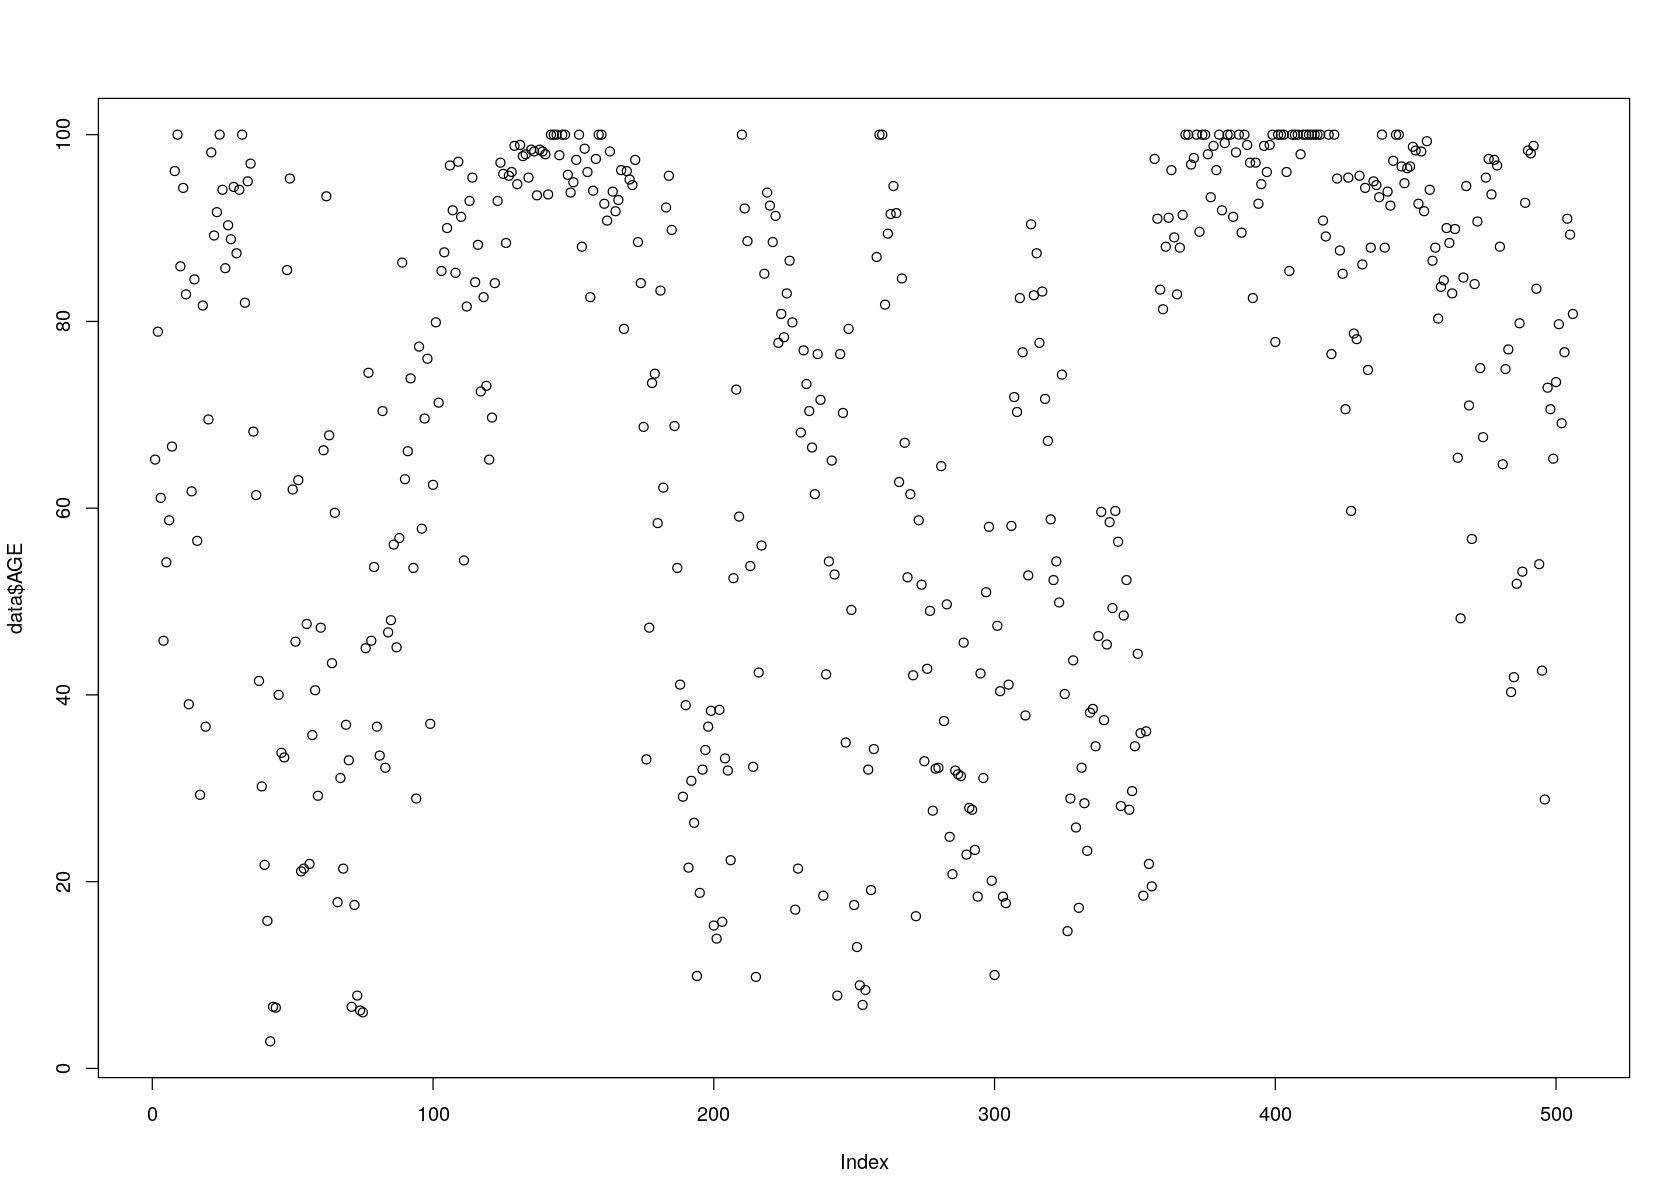

In [21]:
plot(data$AGE)

### Histogramas

Es un tipo de gráfica de barras que muestra conteos o frecuencias relativas de valores que caen en diferentes intervalos.

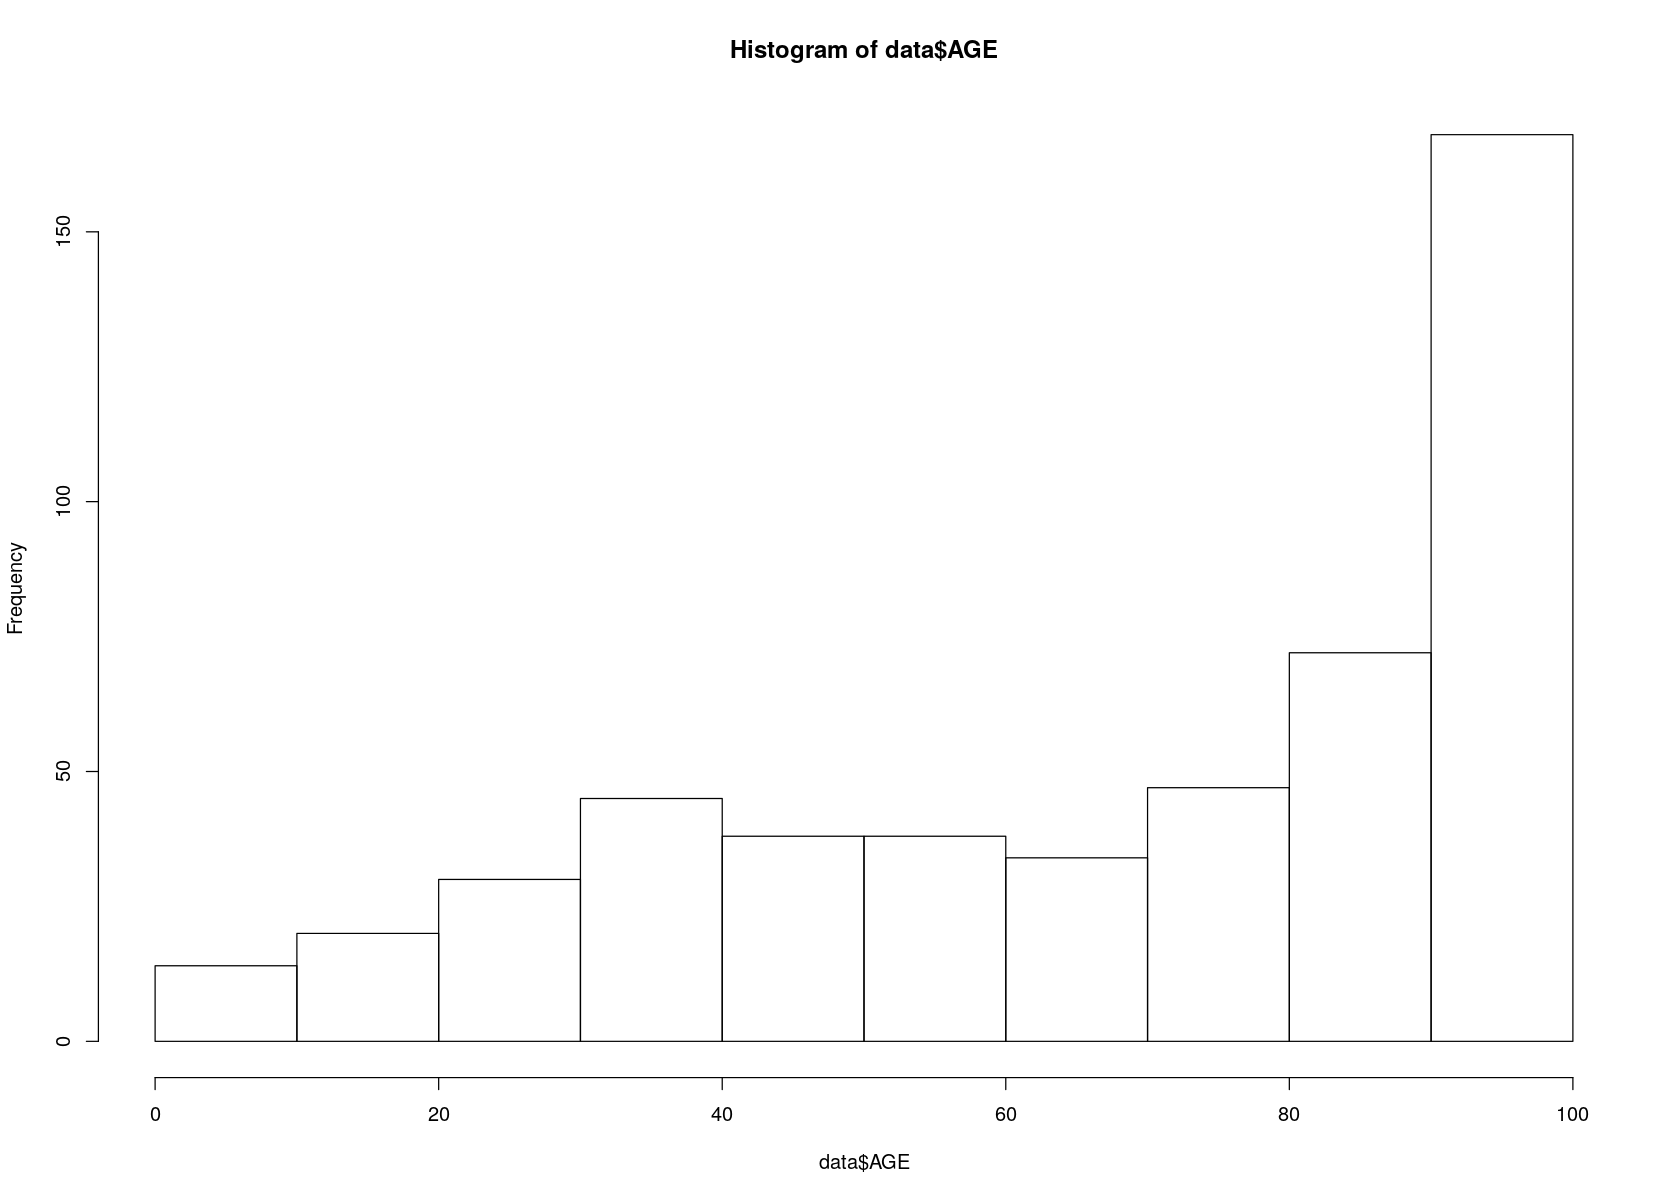

In [22]:
hist(data$AGE)

Podemos cambiar el número de barras usando el parámetro breaks

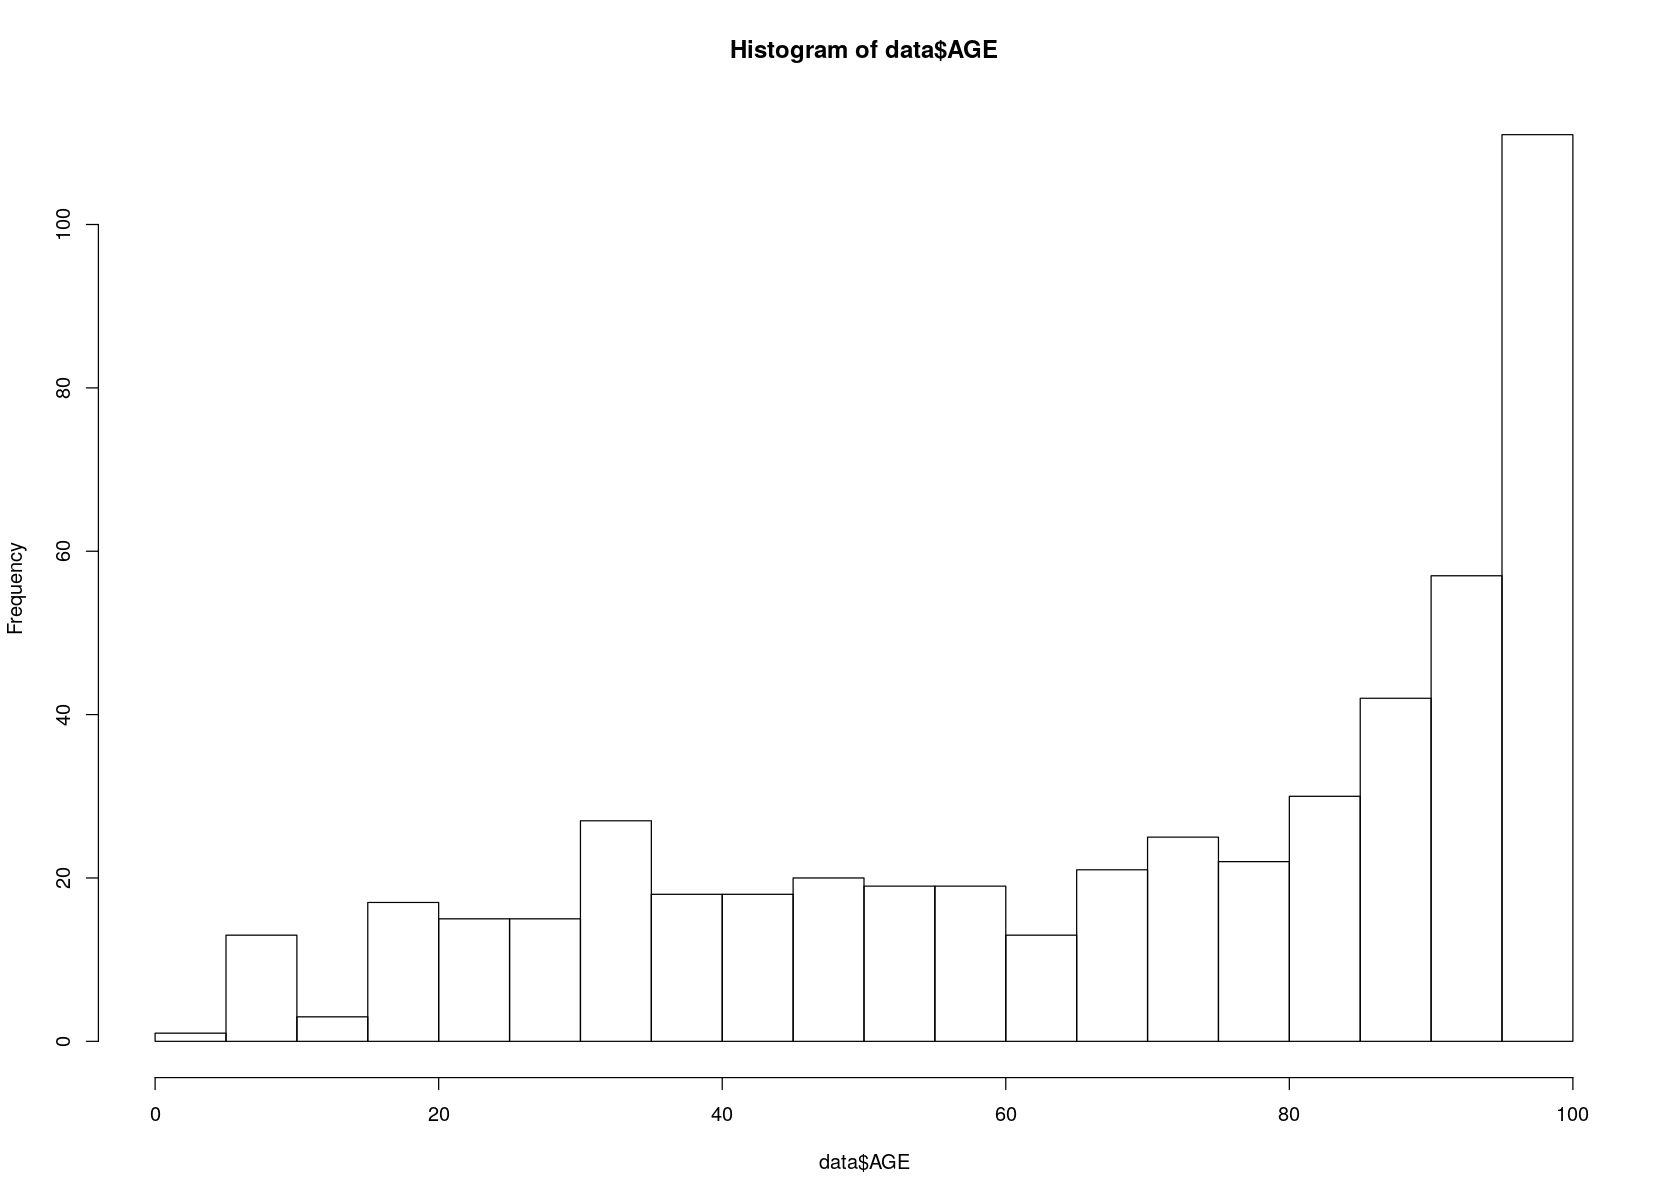

In [36]:
hist(data$AGE, breaks=20)

### Gráficos de densidad (también llamados gráficas Kernel o histogramas suavizados)

Muestra las frecuencias relativas locales de los puntos a lo largo del eje X. En otras palabras, en los intervalos donde hay más puntos/observaciones la gráfica crece indicando mayor “densidad”.

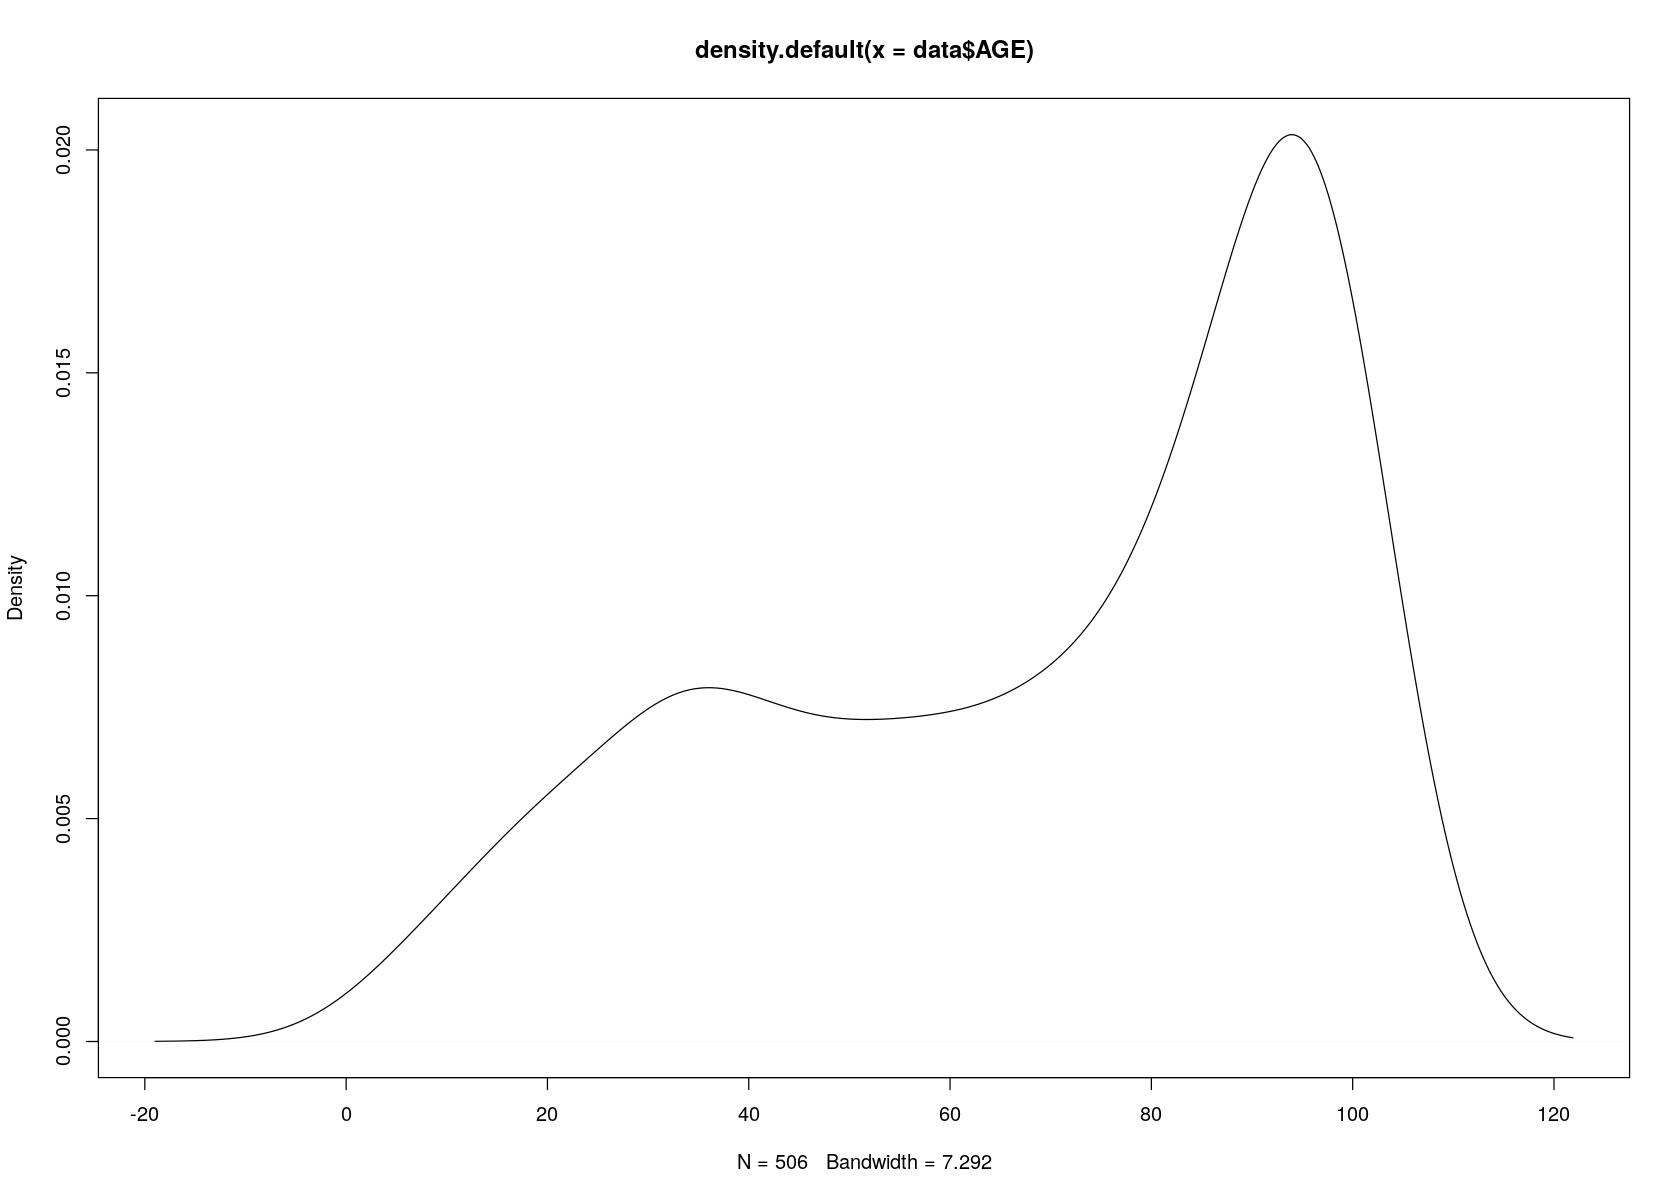

In [24]:
plot(density(data$AGE))

### Gráfico Q-Q

Se usa para revisar si los datos siguen una distribución **aproximadamente** normal.

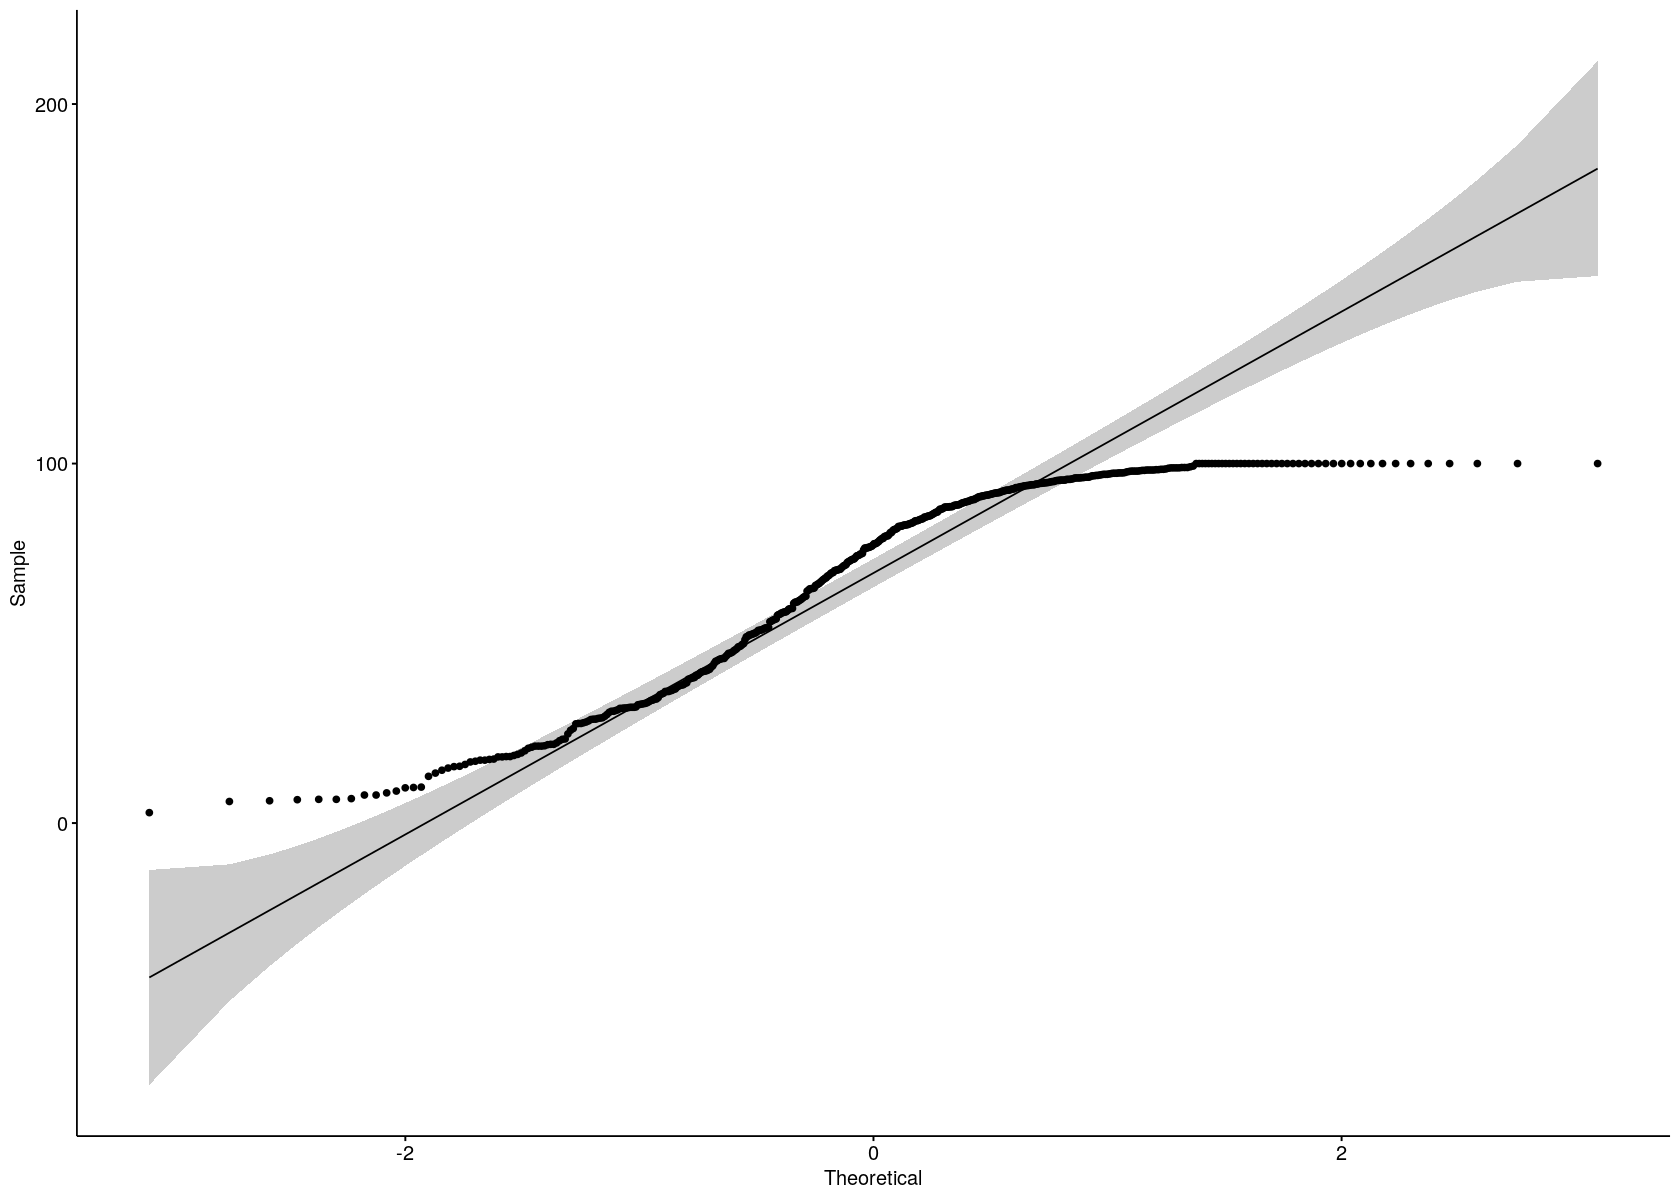

In [38]:
ggqqplot(data, x = "AGE")

### Función de distribución empírica acumulada

Muestra la frecuencia relativa acumulada para los valores de la muestra.

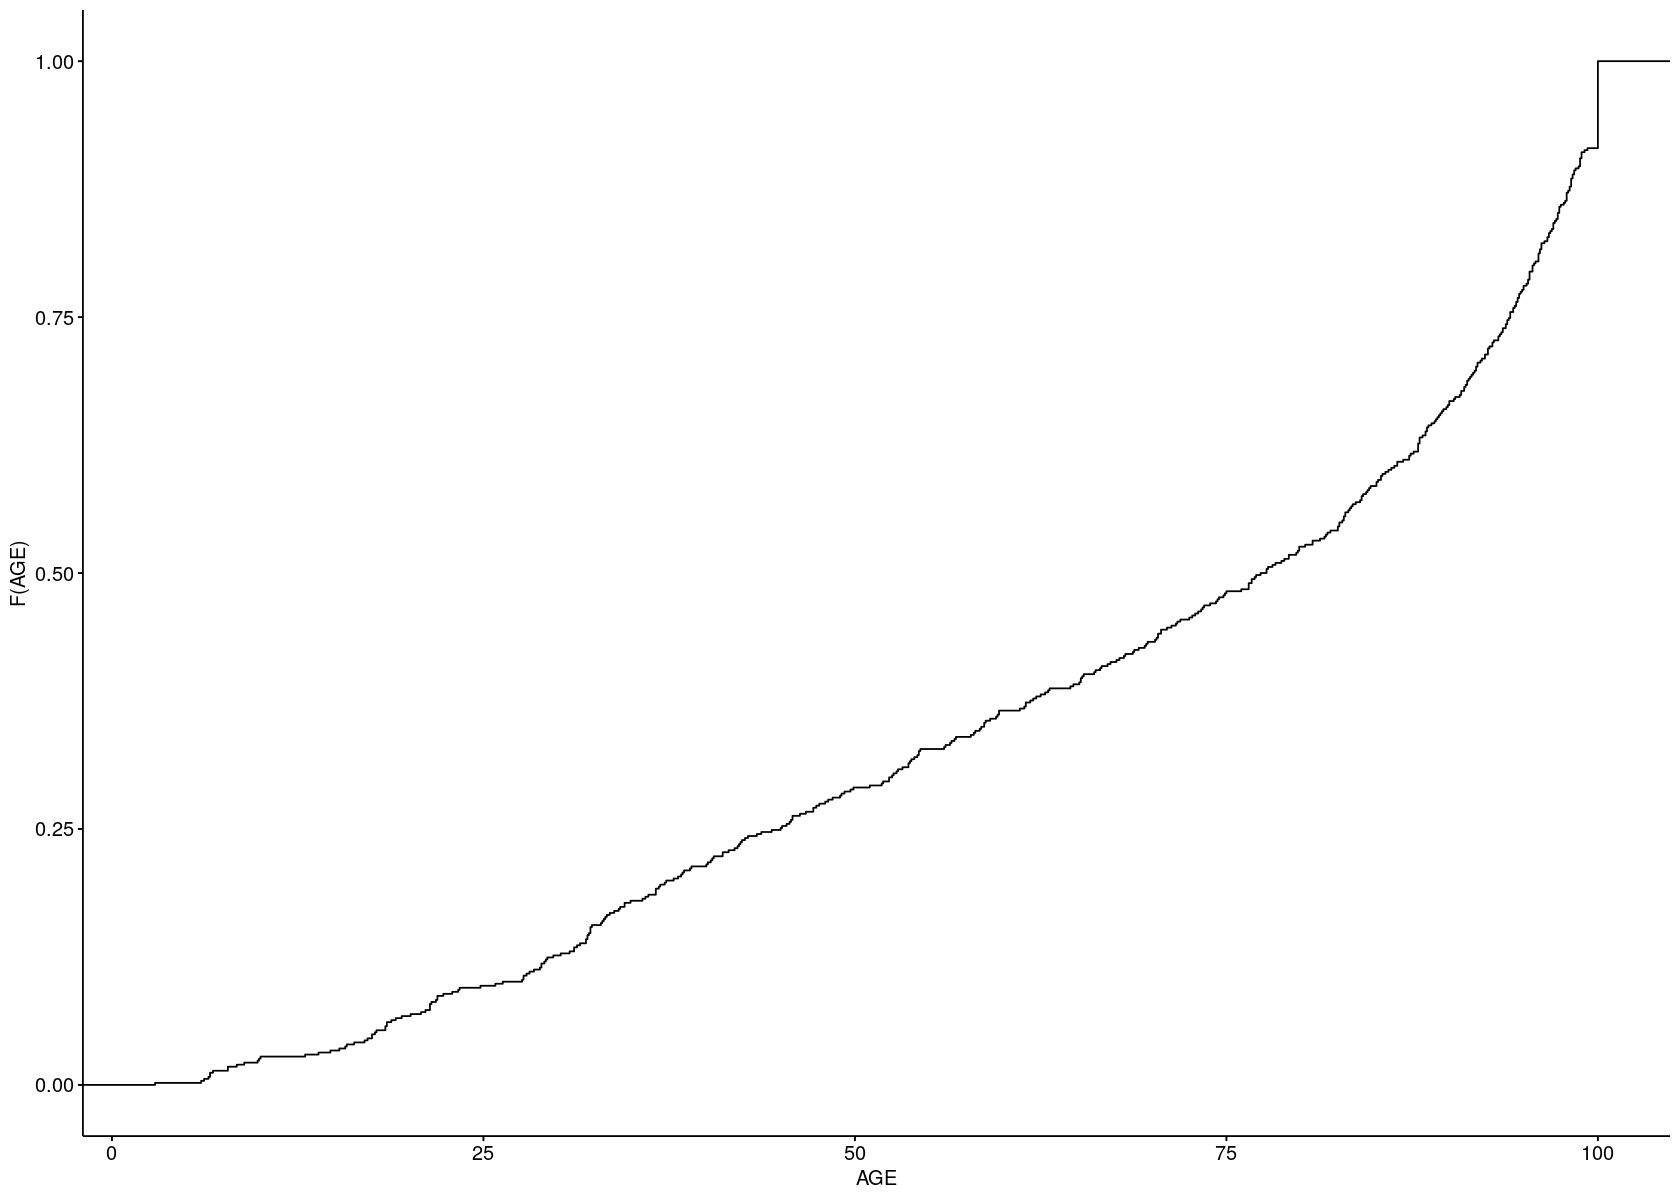

In [26]:
ggecdf(data, x = "AGE")

### Boxplot

Muestra la ubicación, dispersión y distribución de una variable mediante la construcción de una figura en forma de caja con un conjunto de líneas (bigotes) que se extienden desde los extremos de la caja. Los bordes del cuadro se dibujan en los percentiles 25 y 75 de los datos, y una línea en el medio del cuadro marca el percentil 50.

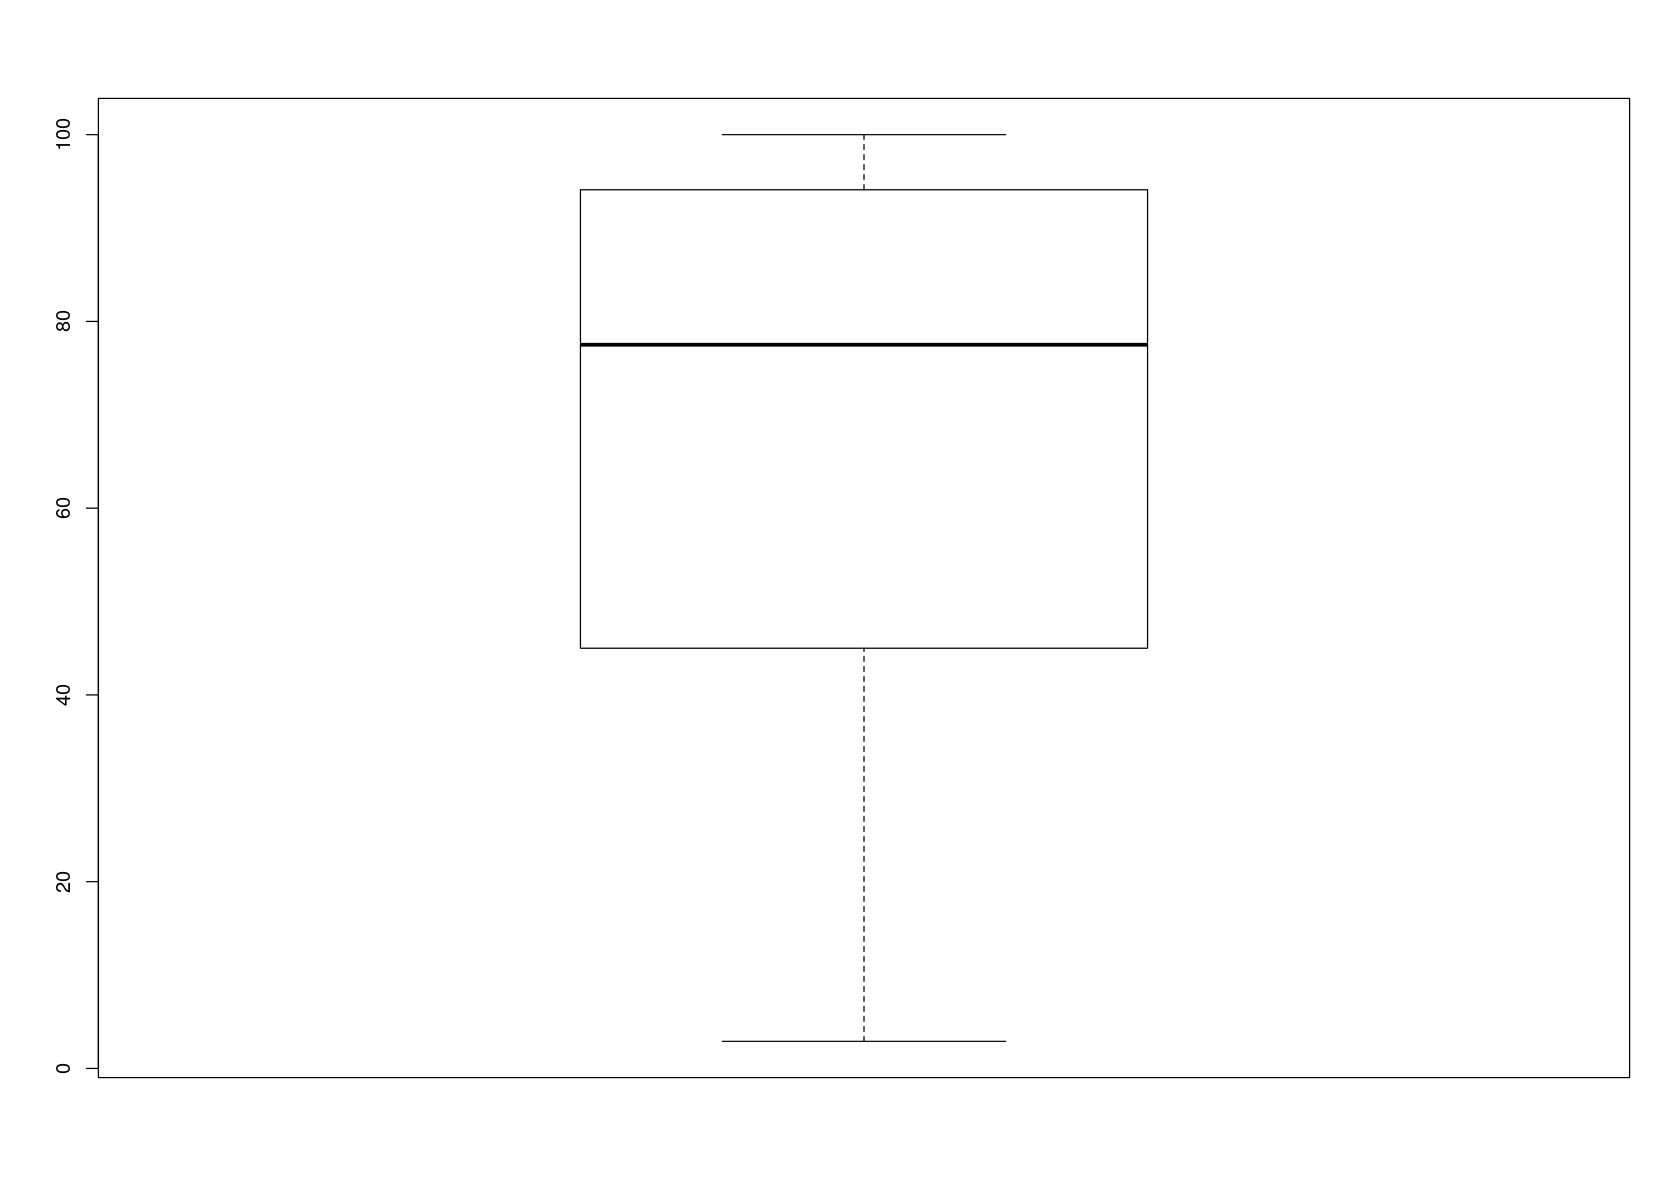

In [27]:
boxplot(data$AGE)

**Nota:** en este ejemplo todas las variables de la base de datos son cuantitativas (en adelante nos referiremos a ellas como **variables contínuas**), y en estos casos los tipos de gráficos que más se usan son los histogramas y los boxplots. Si tuviésemos variables cualitativas (en adelante nos referiremos a ellas como **variables categóricas**), estas usualmente se representan mediante tablas de contingencia, diagramas de barras o diagramas de torta.

### Diagrama de barras

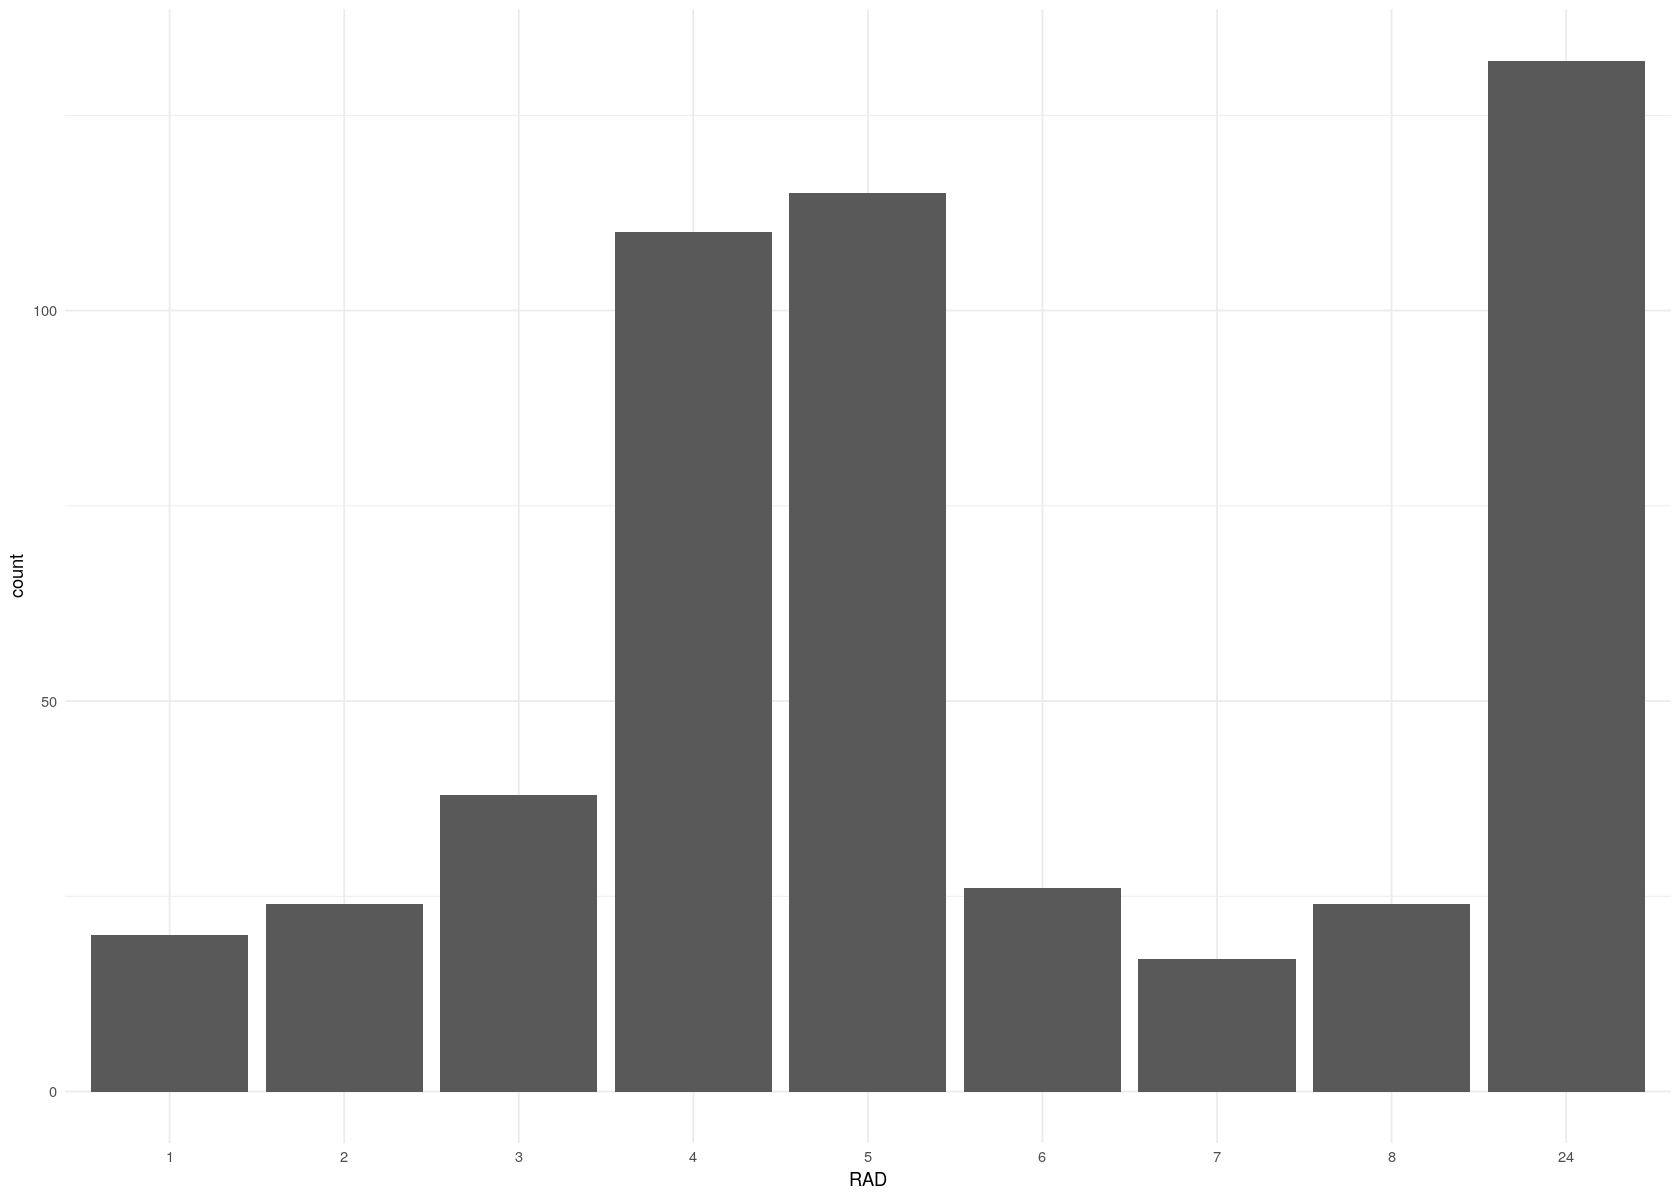

In [28]:
# Sin orden
ggplot(data, aes(x = RAD))+
  geom_bar(stat="count")+
  theme_minimal()

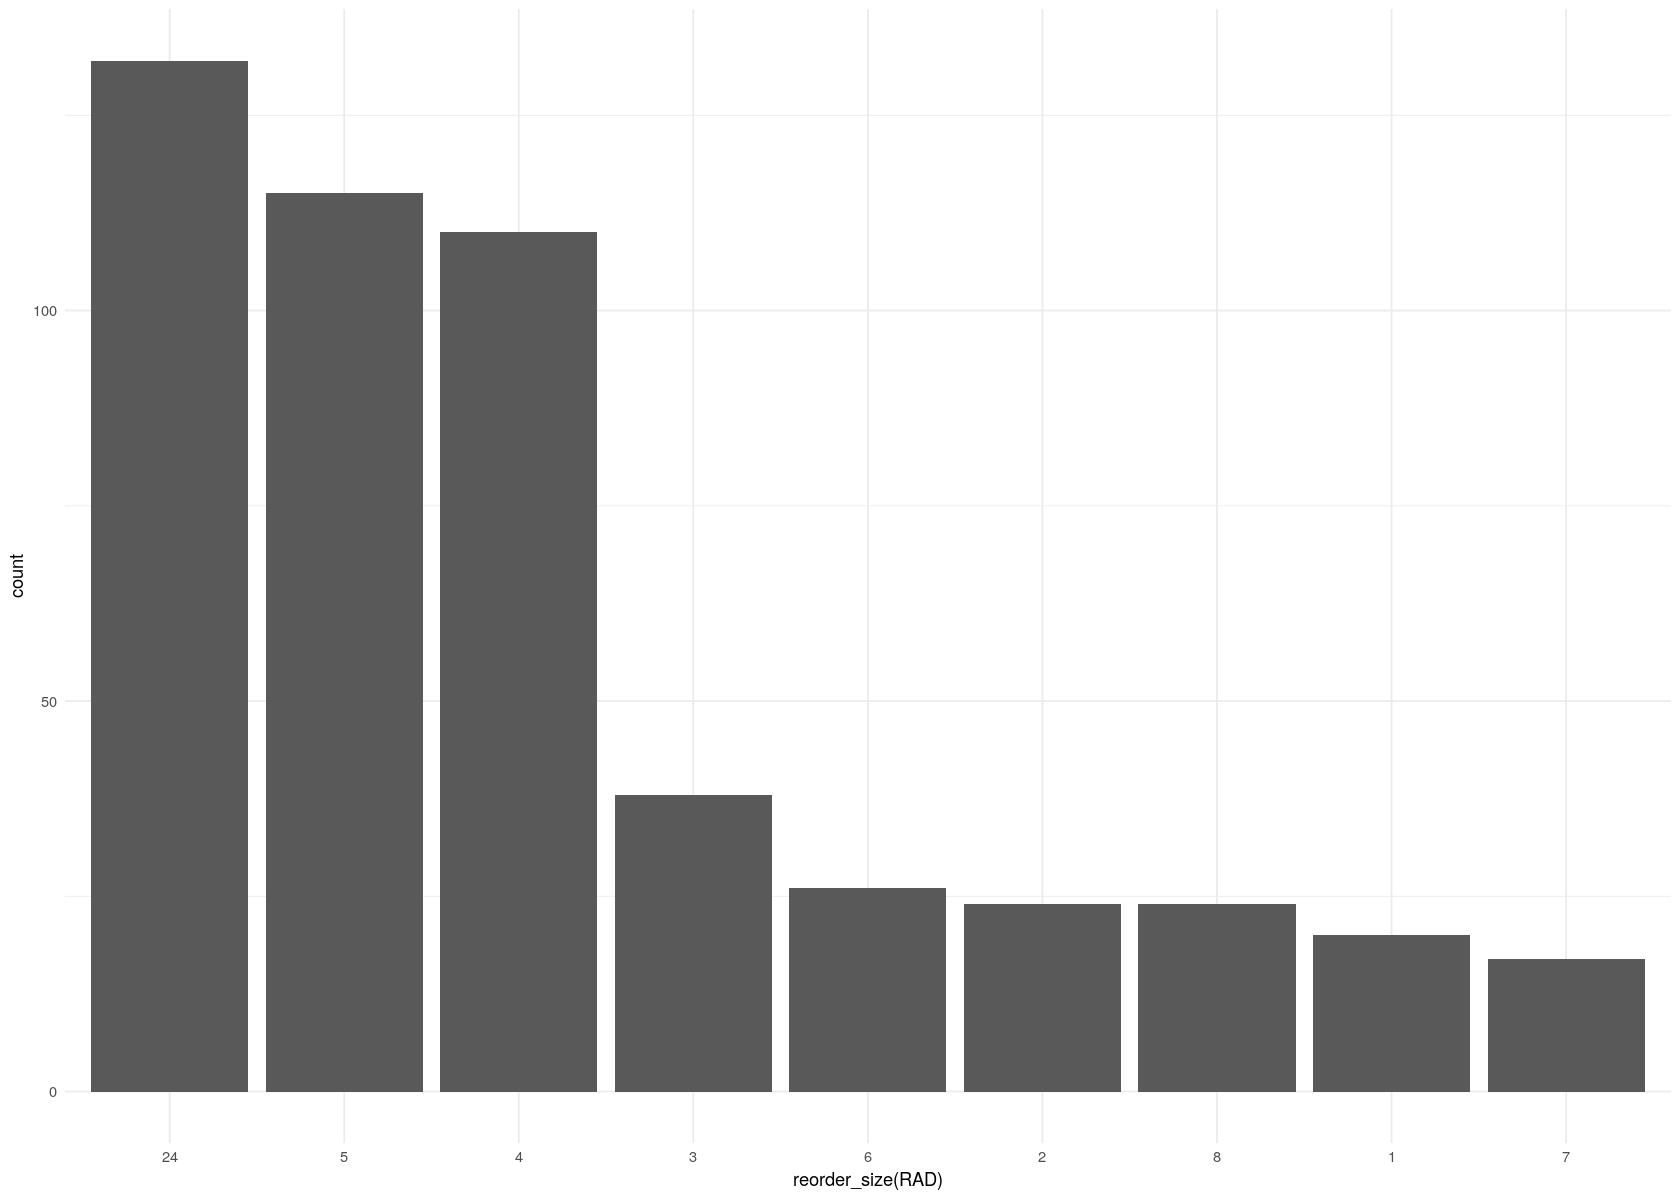

In [29]:
# Ordenado
# Función para reordenar los factores de un vector en orden decreciente
reorder_size <- function(x) {
        factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}
ggplot(data, aes(x = reorder_size(RAD)))+
  geom_bar(stat="count")+
  theme_minimal()

## Gráficos bivariados y multivariados

### Ejemplo: diagrama de dispersión entre dos variables contínuas

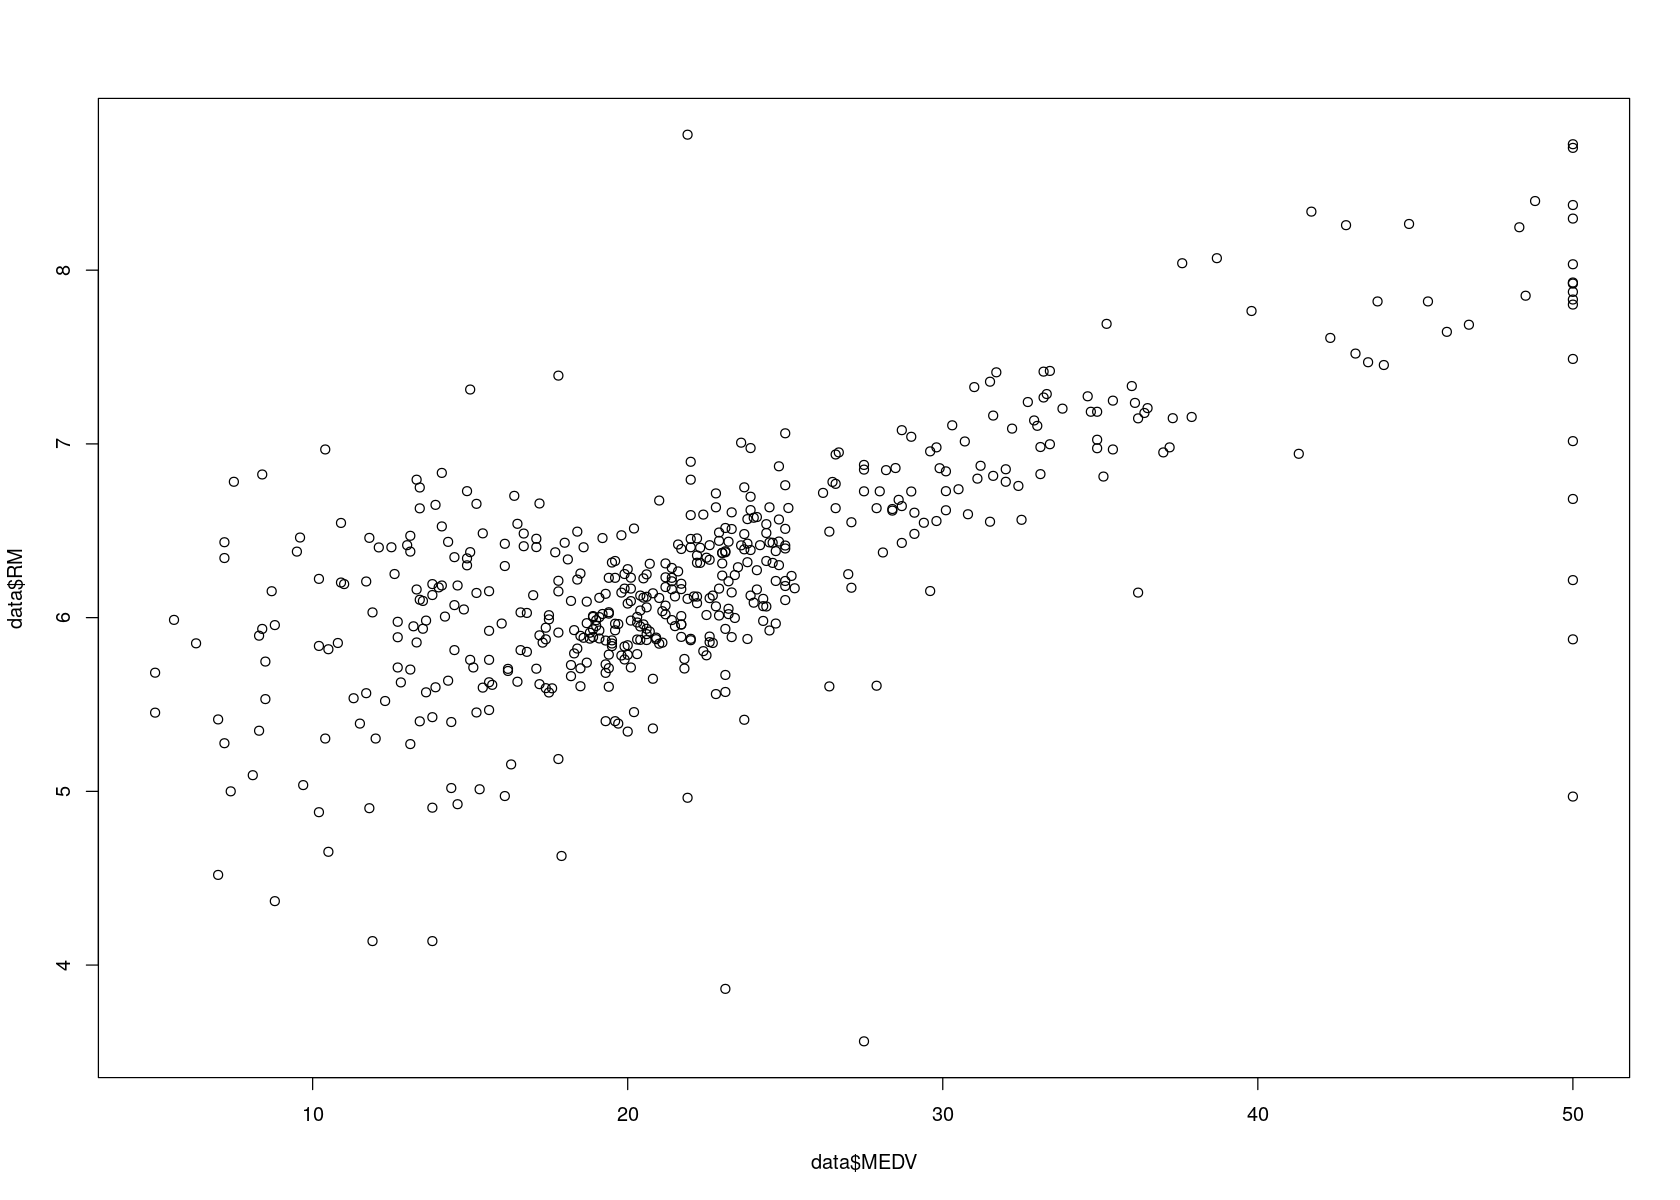

In [30]:
plot(data$MEDV, data$RM)

### Ejemplo: boxplot por grupos (una variable contínua y una categórica)

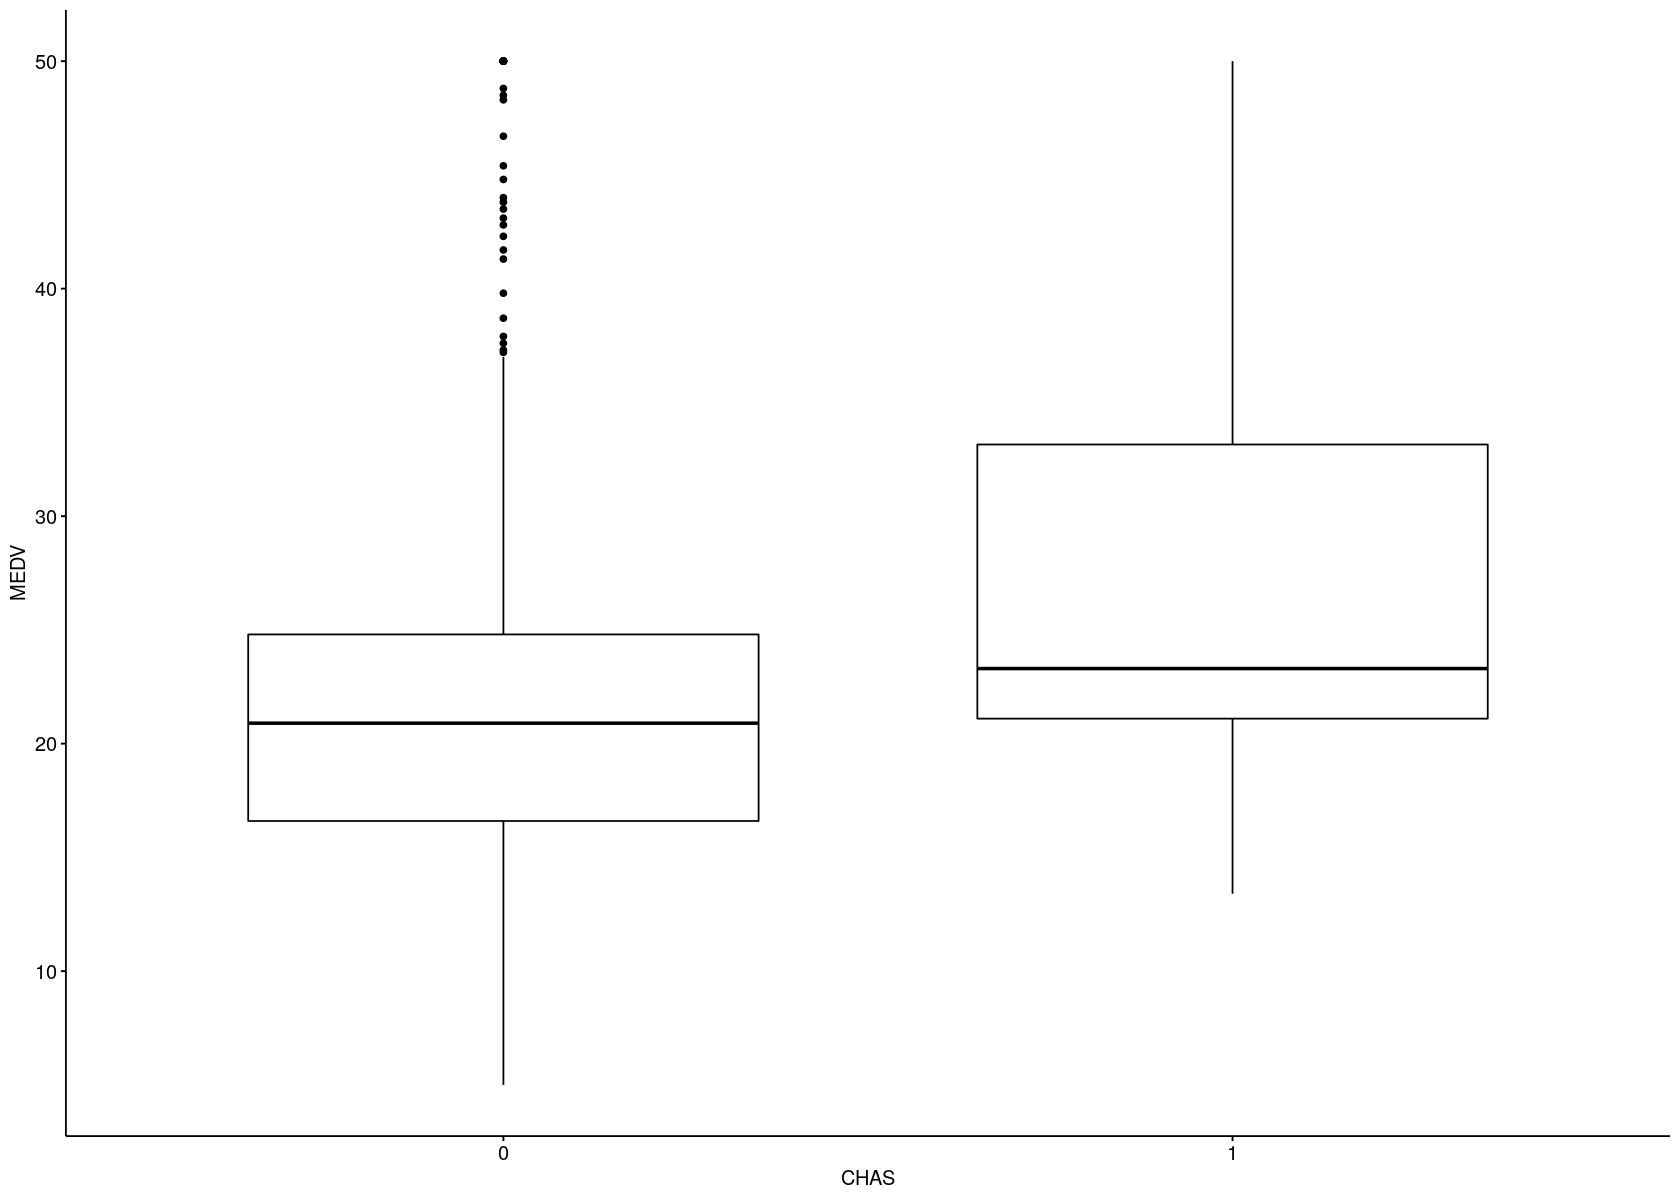

In [31]:
ggboxplot(data, x = "CHAS", y = "MEDV",
          palette = c("#00AFBB", "#E7B800"))

### Ejemplo: matríz de correlación gráfica

corrplot 0.84 loaded



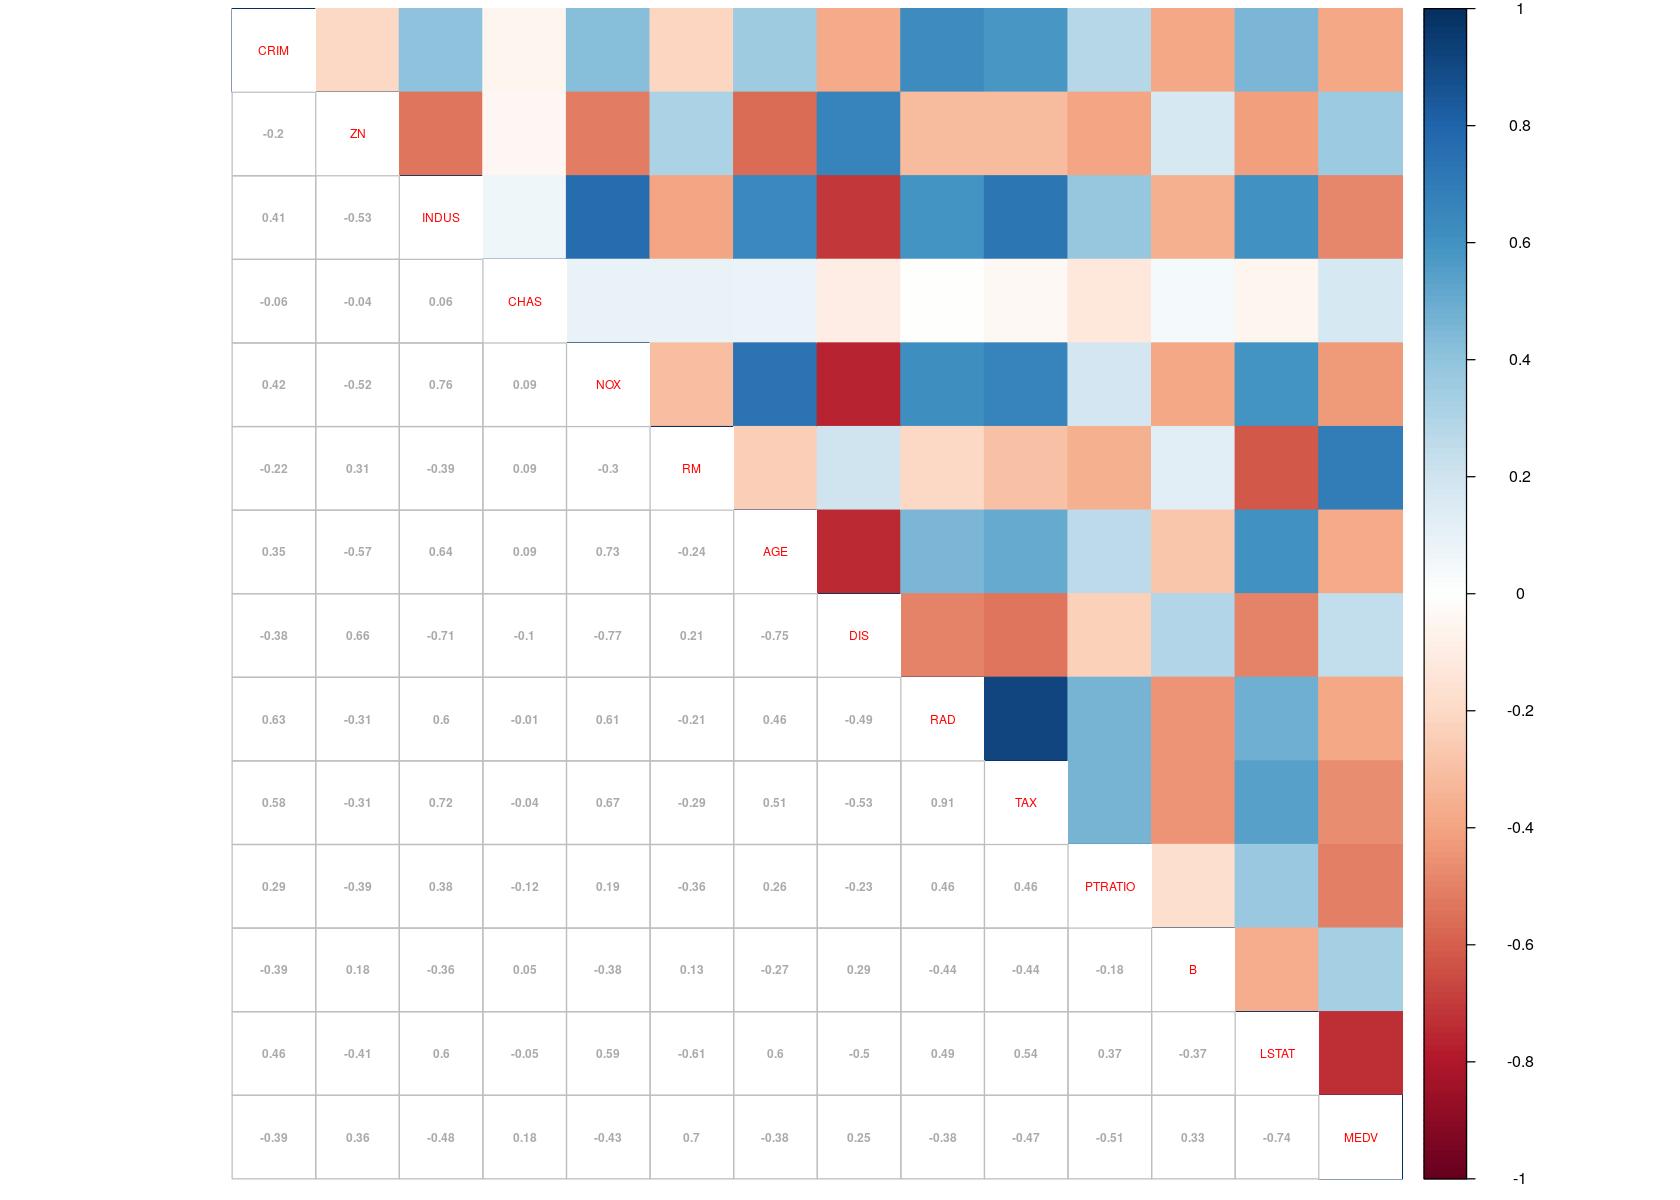

In [32]:
library("corrplot")
data_raw %>% 
  cor %>% 
  corrplot.mixed(lower = "number", upper = "color", lower.col = "#aaaaaa", number.cex = 0.6, tl.cex = 0.6)

## Una librería útil con una interfaz para hacer gráficas: esquisse

In [39]:
## Instalamos la librería
# install.packages("esquisse")

## Cargamos la librería
library("esquisse")

## Llamamos a la función esquisser especificando con cuales datos queremos trabajar
esquisser(data = data, viewer = "browser")


Listening on http://127.0.0.1:3244

Warning message:
“Error in : Aesthetics can not vary with a ribbon”
Warning message:
“Error in : Aesthetics can not vary with a ribbon”
Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment)

Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning mess

## Gráficos profesionales

- [Galería de gráficas en R](https://www.r-graph-gallery.com/)
- [Top 50 de visualizaciones en R](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)
